## **3주차 파이썬기초 강의 코드**

### 목차

- 확률분포 개념정리 

- 조건부 확률정의 

- 확률함수 

- 이산형 확률분포 

- 연속형 확률분포 

---

### **라이브러리**


In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm
from scipy.special import comb

import math

### **모집단의 중심점 추정하기**
- 6명 학생들의 수학점수 (p.13)

In [1]:
math_score = [89,74,91,88,72,84]

# 표본평균 구하기
mean_score = sum(math_score) / len(math_score)

# 중앙값 구하기
sorted_scores = sorted(math_score)
length = len(sorted_scores)

if length % 2 == 1:  # 홀수 개의 데이터일 때
    median_score = sorted_scores[length // 2] 
else:  # 짝수 개의 데이터일 때
    median_score = (sorted_scores[(length - 1) // 2] + sorted_scores[length // 2]) / 2

print("표본평균:", mean_score)
print("중앙값:", median_score)


표본평균: 83.0
중앙값: 86.0


### **모집단의 중심점 추정하기**
- 상대도수에서의 중심점 추정하기 (p.14)

In [14]:
# 주어진 데이터
beans = [1, 2, 3, 4, 5, 6]
frequencies = [2, 4, 21, 18, 10, 5]

# 데이터 확장 (예: [1,1,2,2,2,2,...])
expanded_data = np.repeat(beans, frequencies)

# 표본평균 계산
sample_mean = np.mean(expanded_data)

# 중앙값 계산
median = np.median(expanded_data)

# 최빈값 계산
mode = stats.mode(expanded_data).mode[0]

print("표본평균:", sample_mean)
print("중앙값:", median)
print("최빈값:", mode)

표본평균: 3.75
중앙값: 4.0
최빈값: 3


/var/folders/xb/sftq69_s3mv3ypd77h3xxhxc0000gn/T/ipykernel_36226/2227372622.py:18: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(expanded_data).mode[0]


- 상대도수에서의 중심점 추정하기 시각화(p.15)

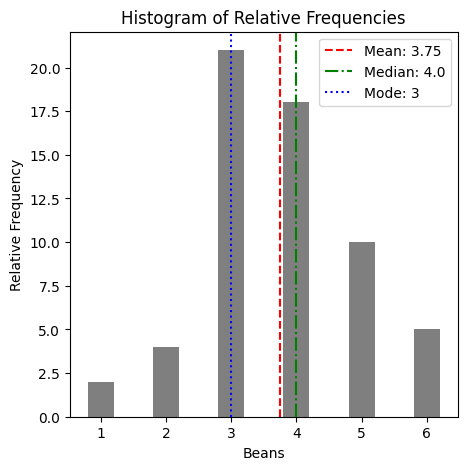

In [35]:
import matplotlib.pyplot as plt

# 주어진 데이터
beans = [1, 2, 3, 4, 5, 6]
relative_frequencies = [2, 4, 21, 18, 10, 5]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# 상대도수 히스토그램 그리기
ax.bar(beans, relative_frequencies, width=0.4, align='center', color='black', alpha=0.5)

# 평균, 중앙값, 최빈값에 대한 수직선 그리기
ax.axvline(sample_mean, color='r', linestyle='--', label=f'Mean: {sample_mean}')
ax.axvline(median, color='g', linestyle='-.', label=f'Median: {median}')
ax.axvline(mode, color='b', linestyle=':', label=f'Mode: {mode}')

# 표시 설정
ax.set_title("Histogram of Relative Frequencies")
ax.set_xlabel("Beans")
ax.set_ylabel("Relative Frequency")
# 범례 표시
ax.legend()
plt.show()

- 상대도수에서의 중심점 추정하기 여러 분포형태 (p.16)

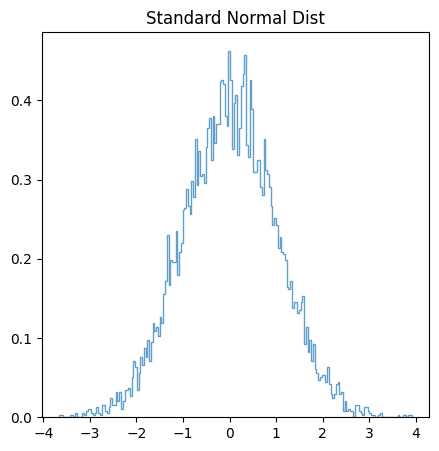

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# 평균0, 분산1 표준정규분포 X ~ N(0,1)

normal_data = np.random.normal(0,1,10000)
normal_dist = ax.hist(
    normal_data, 
    histtype='step', 
    bins=200, 
    density=True, 
    alpha=.7
)

ax.set_title('Standard Normal Dist')

plt.show()


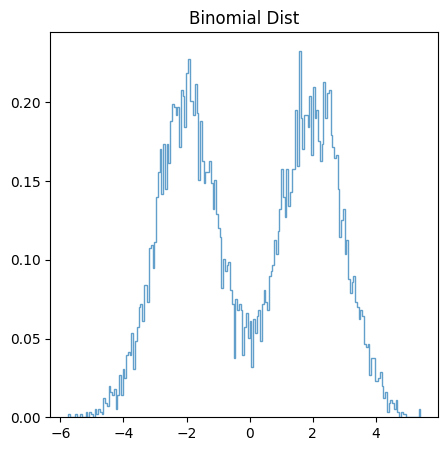

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# 이항 정규분포 X1 ~ N(-2,1), X2 ~ N(2,1)

binomial_data = np.concatenate(
    [
        np.random.normal(-2,1,5000),
        np.random.normal(2,1,5000)
    ]
) 

binomial_dist = ax.hist(
    binomial_data, 
    histtype='step', 
    bins=200, 
    density=True, 
    alpha=.7
)

ax.set_title('Binomial Dist')

plt.show()


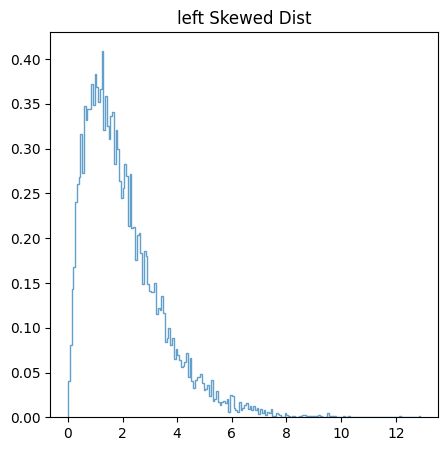

In [70]:

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# X ~ Gamma(-2,1)
left_skewed_data = np.random.gamma(2, 1, 10000)

left_skewed_dist = ax.hist(
    left_skewed_data, 
    histtype='step', 
    bins=200, 
    density=True, 
    alpha=.7
)

ax.set_title('left Skewed Dist')

plt.show()

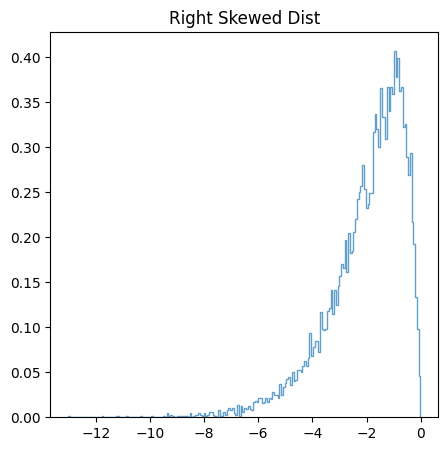

In [69]:

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# X ~ Gamma(-2,1)
right_skewed_data = -np.random.gamma(2, 1, 10000)

right_skewed_dist = ax.hist(
    right_skewed_data, 
    histtype='step', 
    bins=200, 
    density=True, 
    alpha=.7
)

ax.set_title('Right Skewed Dist')

plt.show()

--- 
### **모집단의 퍼진정도 추정하기**
- 표본분산 수식 유도 (p.18)

In [71]:
# 1. 임의의 데이터 세트 생성
data = np.array([3, 5, 7, 9, 11, 13])

# 2. 표본평균 계산
mean_data = np.mean(data)

# 3. 각 데이터 포인트와 표본평균의 차이의 제곱 계산
squared_differences = (data - mean_data) ** 2

# 4. 제곱된 차이들의 합을 계산
sum_of_squared_differences = np.sum(squared_differences)

# 5. 합을 n-1로 나누어 표본분산 계산
sample_variance = sum_of_squared_differences / (len(data) - 1)

print(f"표본분산: {sample_variance}")

표본분산: 14.0


- 표본분산 수식 유도 (p.19)

In [75]:
n = len(data)
x_var = np.mean(data)

sample_variance = (np.sum(data**2) - n*(x_var**2)) / (n-1)

print(f"표본분산: {sample_variance}")

표본분산: 14.0


- 범위 계산하기 (p.21) 

In [95]:
math_score = [89,74,91,88,72,84]

sample_variance = np.var(math_score,ddof=1)
std_dev = np.sqrt(sample_variance)
rng = max(math_score) - min(math_score)

print(f"표본분산: {sample_variance}") 
print(f"표준편차: {std_dev:.3}") 
print(f"최대 최소 범위: {rng}") 



표본분산: 65.6
표준편차: 8.1
최대 최소 범위: 19


- 백분위수 (p.24) 
> numpy 의 백분위수 계산시 기존 강의자료의 16 * 백분위수가 아닌 (16-1)* 백분위수로 계산됨

In [109]:
data = [42, 40, 38, 37, 43, 49, 78, 38, 45, 44, 40, 38, 41, 35, 31, 44]


# 20th percentile
p20 = np.percentile(data, 20, method='linear')
print(f"제 20백분위수: {p20}")

# 50th percentile (median)
p50 = np.percentile(data, 50)
print(f"제 50백분위수 (중앙값): {p50}")

# 100th percentile (maximum)
p100 = np.percentile(data, 100)
print(f"제 100백분위수 (최댓값): {p100}")

제 20백분위수: 38.0
제 50백분위수 (중앙값): 40.5
제 100백분위수 (최댓값): 78.0


- 상자그림 해석 (p.27)

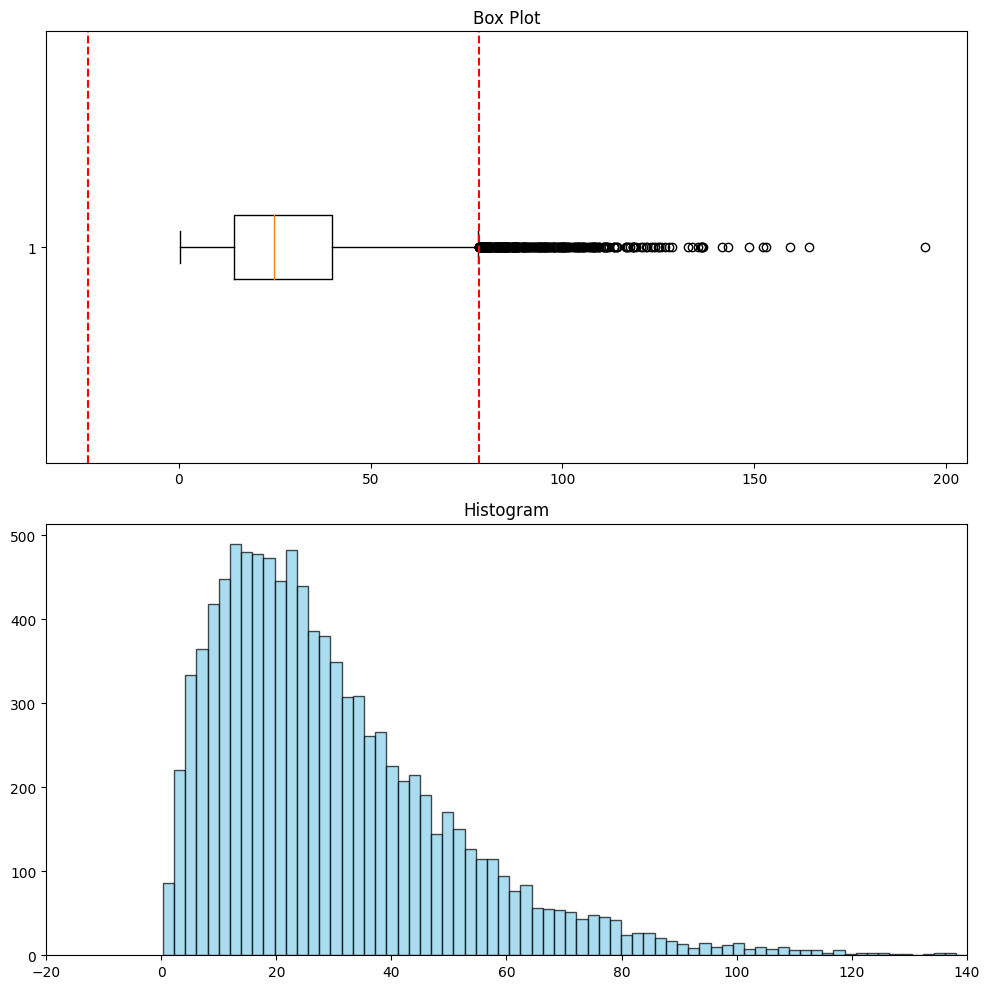

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 왼쪽으로 치우친 데이터 생성
np.random.seed(0)
data = np.random.gamma(2, 15, 10000)

# 데이터의 사분위수 계산
q1 = np.percentile(data, 25)
q2 = np.percentile(data, 50)
q3 = np.percentile(data, 75)
iqr = q3 - q1

# 1.5 * IQR에 해당하는 값을 계산
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# 그림 그리기
fig, axes = plt.subplots(2,1,figsize=(10, 10))

# 상자 그림 (눕힌 형태)
axes[0].boxplot(data, vert=False)
axes[0].set_title("Box Plot")
axes[0].axvline(x=lower_bound, color='r', linestyle='--')
axes[0].axvline(x=upper_bound, color='r', linestyle='--')

# 히스토그램
axes[1].hist(data, bins=100, color="skyblue", ec="k", alpha=0.7)
axes[1].set_title("Histogram")
axes[1].set_xlim(-20,140)

plt.tight_layout()
plt.show()

- 변동계수 CV (p.28)

In [128]:

# 데이터
company_a_prices = [76300, 77400, 77900, 77200, 76900, 78800]
company_b_prices = [6400, 7000, 7400, 6900, 7300, 7600]

# 표준편차
std_a = np.std(company_a_prices,ddof=1)
std_b = np.std(company_b_prices,ddof=1)

# 평균
mean_a = np.mean(company_a_prices)
mean_b = np.mean(company_b_prices)

# 변동계수
cv_a = (std_a / mean_a) * 100
cv_b = (std_b / mean_b) * 100

print(f"A 회사의 변동계수: {cv_a:.2f}%")
print(f"B 회사의 변동계수: {cv_b:.2f}%")

A 회사의 변동계수: 1.11%
B 회사의 변동계수: 6.04%


--- 
### **확률의 정의**
- 동전 던지기의 확률 수렴 (p.32)

In [141]:
coin_toss = np.random.choice(['앞','뒷'], size=100000)

head_cnt = np.sum(coin_toss == '앞')

head_prob = head_cnt / len(coin_toss)

head_prob


0.50055

- 조건부 확률에서의 독립 확률 (p.34)
> 첫번째 주사위가 1이 나올 사건과 두번째 6이 나올 사건

In [149]:
n_trials = 1000000  # 주사위를 던질 횟수

# 두 번의 주사위 던지기
dice_rolls_1 = np.random.choice([1, 2, 3, 4, 5, 6], size=n_trials)
dice_rolls_2 = np.random.choice([1, 2, 3, 4, 5, 6], size=n_trials)

# 사건 A: 첫 번째 주사위의 눈금이 1일 확률
event_A = dice_rolls_1 == 1

# 사건 B: 두 번째 주사위의 눈금이 6일 확률
event_B = dice_rolls_2 == 6

# 사건 A와 B의 교집합
event_A_and_B = event_A & event_B

# 확률 계산
p_A = np.mean(event_A)
p_B = np.mean(event_B)
p_A_and_B = np.mean(event_A_and_B)
p_A_times_p_B = p_A * p_B

print(f"P(A) = {p_A:.4f}")
print(f"P(B) = {p_B:.4f}")
print(f"P(A ∩ B) = {p_A_and_B:.4f}")
print(f"P(A) x P(B) = {p_A_times_p_B:.4f}")

# 두 확률이 거의 같은지 확인
if np.isclose(p_A_and_B, p_A_times_p_B, atol=0.001):
    print("두 사건 A와 B는 독립입니다.")
else:
    print("두 사건 A와 B는 독립이 아닙니다.")

P(A) = 0.1667
P(B) = 0.1672
P(A ∩ B) = 0.0282
P(A) x P(B) = 0.0279
두 사건 A와 B는 독립입니다.


- 조건부 확률에서의 배타사건 (p.34)
> 하나의 주사위에서 1과 6이 나올 사건 A, B 

In [151]:

n_trials = 100000  # 주사위를 던지는 횟수

# 주사위 던지기
dice_rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=n_trials)

# 사건 A: 주사위의 눈금이 1일 확률
event_A = dice_rolls == 1

# 사건 B: 주사위의 눈금이 2일 확률
event_B = dice_rolls == 2

# 사건 A와 B의 교집합
event_A_and_B = event_A & event_B

# 교집합의 확률 계산
p_A_and_B = np.mean(event_A_and_B)

print(f"P(A ∩ B) = {p_A_and_B:.4f}")

# 확률이 0인지 확인
if p_A_and_B == 0:
    print("두 사건 A와 B는 배타적입니다.")
else:
    print("두 사건 A와 B는 배타적이 아닙니다.")

P(A ∩ B) = 0.0000
두 사건 A와 B는 배타적입니다.


- 조건부 확률에서의 표본공간의 변화 (p.34)

In [144]:
n_trials = 1000000  # 주사위를 던질 횟수

dice_rolls = np.random.choice([1, 2, 3, 4, 5, 6], size=n_trials)

# 사건 A: 주사위의 눈금이 2일 확률
event_A = dice_rolls == 2

# 사건 B: 주사위의 눈금이 짝수일 확률
event_B = dice_rolls % 2 == 0

# 조건부 확률 P(A|B) 계산
conditional_probability = np.sum(event_A & event_B) / np.sum(event_B)

print(f"P(2|짝수) = {conditional_probability:.2f}")

P(2|짝수) = 0.33


### **확률함수**
- 함수 정의 (Function) (p.36)

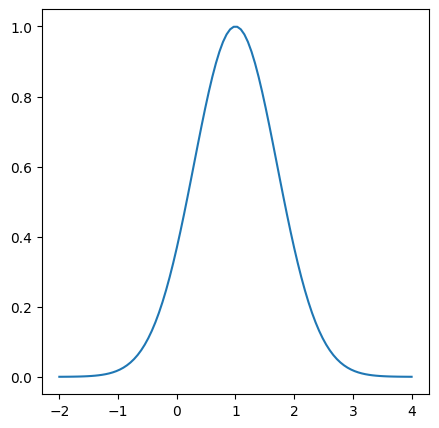

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

x = np.linspace(-2, 4,100) # -2 부터 4까지 데이터 생성

y = np.exp(-(x - 1) ** 2) # 함수 정의 

ax.plot(x, y)
plt.show()

- 이산형 확률함수 (Probability Mass Function, PMF) (p.36)

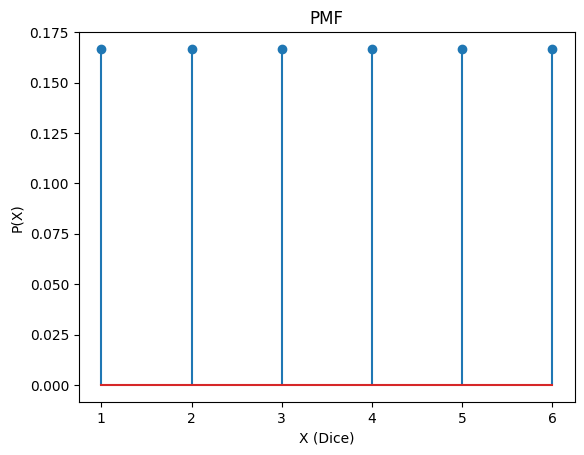

In [174]:
# 이산형 확률변수 X의 가능한 모든 값
x = np.array([1, 2, 3, 4, 5, 6])

# 확률함수 P(X=x)
P_x = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

# 결과를 그래프로 표현
plt.stem(x, P_x)
plt.xlabel('X (Dice)')
plt.ylabel('P(X)')
plt.title('PMF')
plt.show()

- 연속형 확률함수 (Probability Density Function, PDF) (p.36)

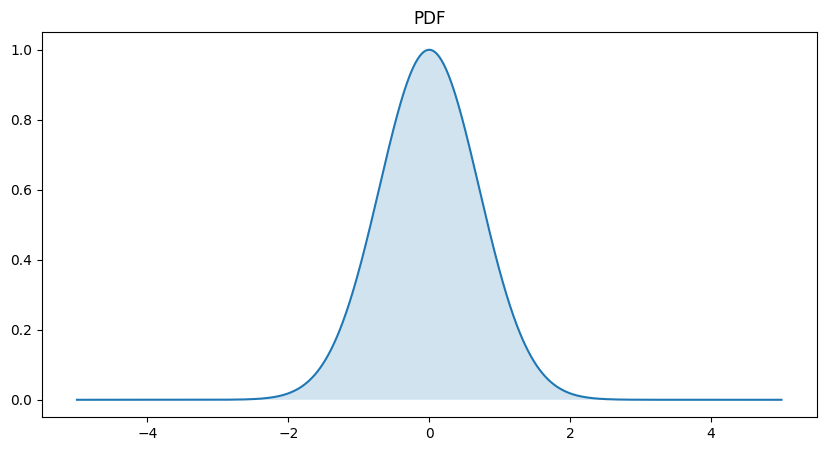

In [176]:
# 연속형 확률밀도함수 (PDF)


# x값 설정
x = np.linspace(-5, 5, 1000)

# mu = 0, sigma = 1인 정규분포의 확률밀도함수 계산
y = np.exp(-x**2) 

# 그래프 그리기
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.plot(x, y)
ax.fill_between(x, y, 0, alpha=0.2)
ax.set_title('PDF')

plt.show()

- 누적분포 함수 (Cumulative Distribution Function, CDF) (p.37)

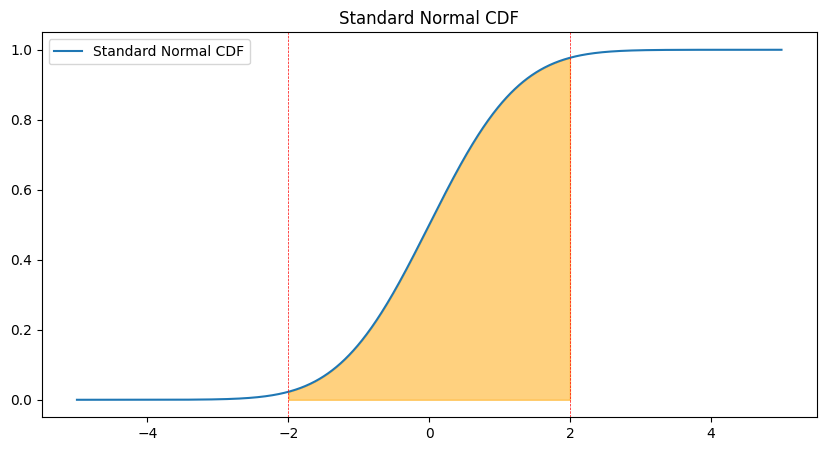

누적 확률 (-2 <= x <= 2): 0.9545


In [179]:
# 그래프 그리기
fig, ax = plt.subplots(1,1,figsize=(10,5))

# x값 설정
x = np.linspace(-5, 5, 1000)

# 표준 정규분포의 누적분포함수 계산
cdf = norm.cdf(x, 0, 1)


ax.plot(x, cdf, label="Standard Normal CDF")
ax.fill_between(x, cdf, 0, where=(-2 <= x) & (x <= 2), color='orange', alpha=0.5)
ax.set_title('Standard Normal CDF')

# 구간 수직선 

ax.axvline(-2, color='red', linestyle='--', linewidth=0.5)
ax.axvline(2, color='red', linestyle='--', linewidth=0.5)

ax.legend()
plt.show()

# -2에서 2까지의 누적 확률 계산
probability = norm.cdf(2) - norm.cdf(-2)
print(f"누적 확률 (-2 <= x <= 2): {probability:.4f}")

- 표준정규분포 pdf 누적 구간

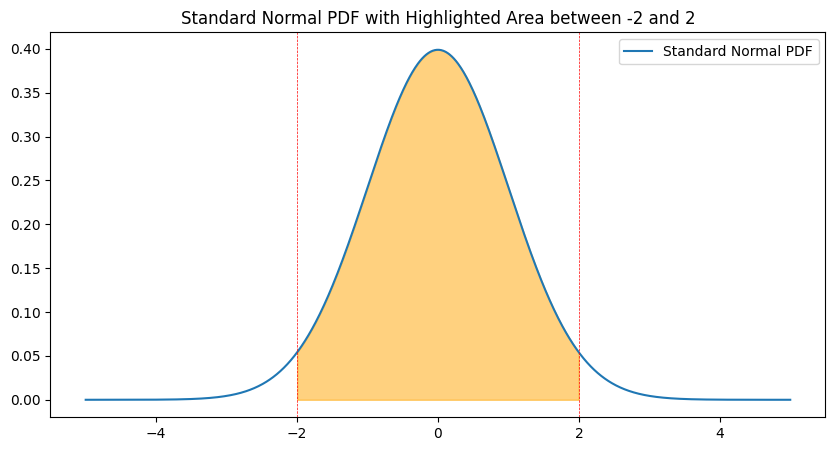

누적 확률 (-2 <= x <= 2): 0.9545


In [181]:


# 그래프 그리기
fig, ax = plt.subplots(1,1,figsize=(10,5))


# x값 설정
x = np.linspace(-5, 5, 1000)

# 표준 정규분포의 확률밀도함수 계산
pdf = norm.pdf(x, 0, 1)


ax.plot(x, pdf, label="Standard Normal PDF")
ax.fill_between(x, pdf, 0, where=(-2 <= x) & (x <= 2), color='orange', alpha=0.5)
ax.set_title('Standard Normal PDF with Highlighted Area between -2 and 2')

ax.axvline(-2, color='red', linestyle='--', linewidth=0.5)
ax.axvline(2, color='red', linestyle='--', linewidth=0.5)

ax.legend()
plt.show()

# -2에서 2까지의 누적 확률 계산 (선택적)
probability = norm.cdf(2) - norm.cdf(-2)
print(f"누적 확률 (-2 <= x <= 2): {probability:.4f}")

--- 
### **이산형 확률분포**

- 베르누이 분포 (p.40)

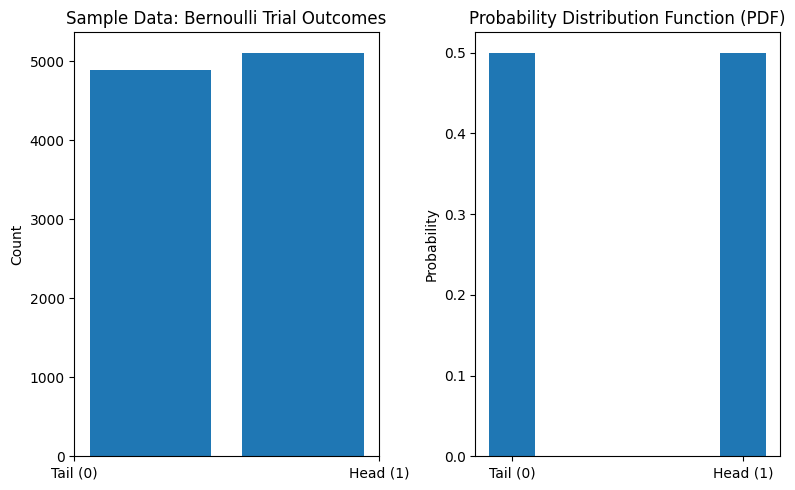

In [186]:
# 시각화
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# 실험: 동전 던지기 (0: 뒷면, 1: 앞면). 앞면이 나올 확률 p=0.5
p = 0.5
samples = np.random.binomial(1, p, 10000)

# 베르누이 분포의 PDF
x = [0, 1]
y = [1-p, p]

# 예제 데이터 히스토그램
ax[0].hist(samples, bins=2, rwidth=0.8, align='mid')
ax[0].set_title('Sample Data: Bernoulli Trial Outcomes')
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Tail (0)', 'Head (1)'])
ax[0].set_ylabel('Count')

# PDF
ax[1].bar(x, y, width=0.2, align='center')
ax[1].set_title('Probability Distribution Function (PDF)')
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['Tail (0)', 'Head (1)'])
ax[1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

- 이항분포 (p.41)

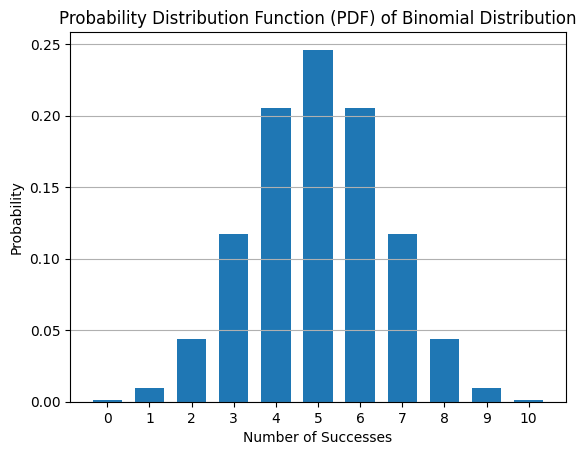

In [1]:
# 이항 분포의 설정값
n = 10  # 시행 횟수
p = 0.5  # 성공 확률

x = np.arange(0, n+1)
y = list()

# pdf 계산  
for k in x: 
    y.append(comb(n, k) * (p**k) * ((1-p)**(n-k))) 

# 시각화
plt.bar(x, y, align='center', width=0.7)
plt.title('Probability Distribution Function (PDF) of Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.xticks(x)
plt.grid(axis='y')

plt.show()

- 초기하 분포 (p.45)

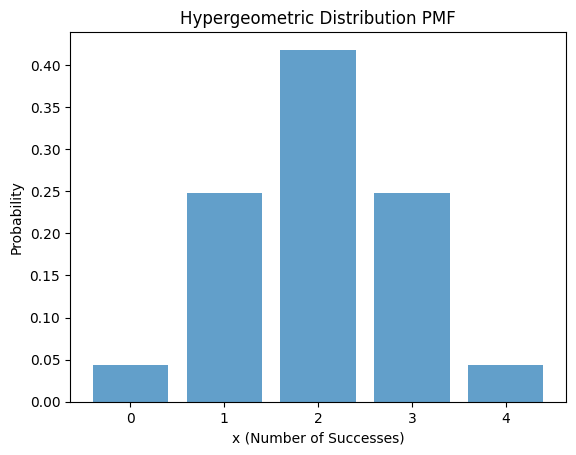

In [8]:

# 초기하 분포의 매개변수
N = 20  # 표본의 크기
D = 10  # 범주 A에 속하는 구성원 수 
n = 4  # 뽑아야 하는 표본의 크기 

# x의 가능한 값 (범주 A에서 뽑히는 표본)
x = np.arange(0, n+1) # 0,1,2 

y = list() 

# 확률질량함수 계산

for k in x: 
    y.append(comb(D,k) * comb(N-D,n-k) / comb(N,n)) 

# 시각화
plt.bar(x, y, alpha=0.7)
plt.xlabel('x (Number of Successes)')
plt.ylabel('Probability')
plt.title('Hypergeometric Distribution PMF')
plt.xticks(x)
plt.show()

- 포아송 분포 (p.46)

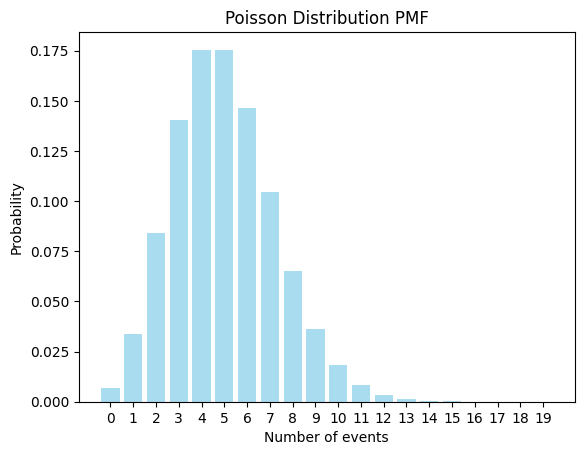

In [14]:
# 매개변수 설정
lambda_ = 5  # 단위 시간/공간당 평균 사건 발생 횟수

# 시각화를 위한 x의 범위 (보통 0부터 2*lambda까지 보는 것이 좋습니다)
x = np.arange(0, 20)
y = list() 
# 포아송 확률질량함수 정의

for k in x: 
    y.append((np.exp(-lambda_) * lambda_**k) / math.factorial(k)) 

# 시각화
plt.bar(x, y, alpha=0.7, color='skyblue')
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title('Poisson Distribution PMF')
plt.xticks(x)
plt.show()

- 포아송 분포의 구간의 독립성 (P.47)

상황: 한 시간 동안 특정 지역에 평균적으로 5번의 번개가 친다고 가정합니다. 

첫 번째 first_interval 데이터 집합: 1000일 동안 각각 첫 번째 시간(예: 1시~2시)에 번개가 얼마나 많이 치는지의 데이터

두 번째 second_interval 데이터 집합: 같은 1000일 동안 각각 두 번째 시간(예: 2시~3시)에 번개가 얼마나 많이 치는지의 데이터

In [19]:

lambda_ = 5  # 단위 시간당 평균 사건 발생 횟수
sample_size = 10000

# 첫 번째 시간 구간에서의 사건 발생 횟수와 두 번째 시간 구에서의 사건 발생 횟수를 추출
first_interval = np.random.poisson(lambda_, sample_size)
second_interval = np.random.poisson(lambda_, sample_size)

# 상관계수 계산
correlation = np.corrcoef(first_interval, second_interval)[0, 1]

print(f"Correlation between two independent intervals: {correlation:.4f}")

Correlation between two independent intervals: 0.0029


--- 
### **연속형 확률분포**

- 균일분포 (p.50-51)

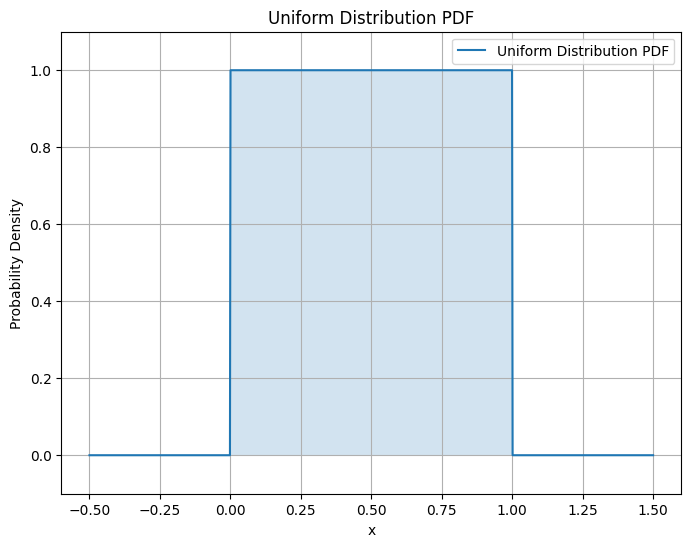

In [22]:

# x 값 정의
x = np.linspace(-0.5, 1.5, 1000)

# pdf 정의
pdf = np.where((0 <= x) & (x <= 1), 1, 0)

# 시각화
plt.figure(figsize=(8,6))
plt.plot(x, pdf, label='Uniform Distribution PDF')
plt.fill_between(x, pdf, 0, where=((0 <= x) & (x <= 1)), alpha=0.2)
plt.title('Uniform Distribution PDF')
plt.ylim(-0.1, 1.1)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

- 정규분포 시각화 (p.53)

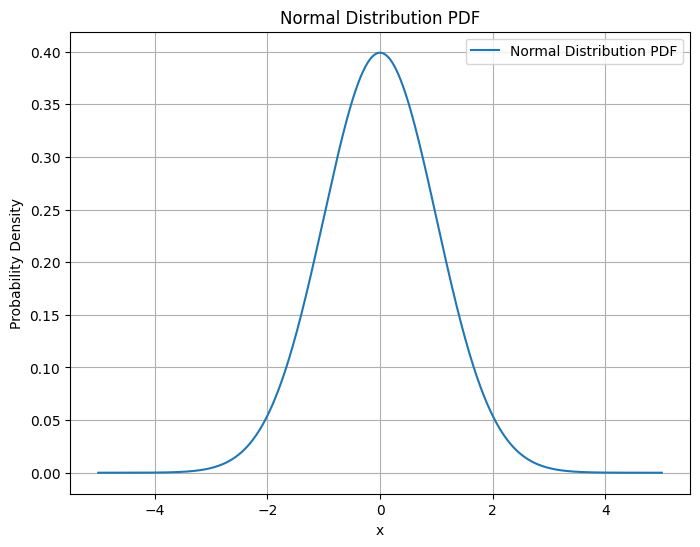

In [34]:
# x 값 정의
x = np.linspace(-5, 5, 1000)

# 평균과 표준편차
mu = 0
sigma = 1

# 정규분포의 pdf 정의
y = (1/(sigma * np.sqrt(2 * np.pi))) * np.exp( - (x - mu)**2 / (2 * sigma**2) )

# 시각화
plt.figure(figsize=(8,6))
plt.plot(x, y, label='Normal Distribution PDF')
plt.title('Normal Distribution PDF')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

- 지수분포 (p.54)

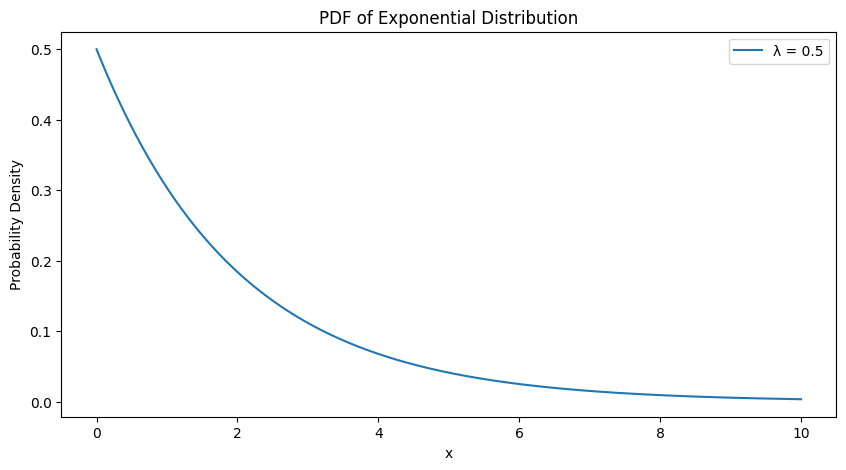

In [24]:

# 지수 분포의 파라미터 설정
lambda_val = 0.5

# 확률밀도함수 정의
x = np.linspace(0, 10, 1000)
pdf = lambda_val * np.exp(-lambda_val * x)

# 시각화
plt.figure(figsize=(10,5))
plt.plot(x, pdf, label=f"λ = {lambda_val}")
plt.title("PDF of Exponential Distribution")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


- 지수분포 무기억성 (p.55)

In [30]:
# 무기억성 확인

lambda_val = 0.5

t = 2
s = 1

# 무기억성 확인
prob_s_plus_t = np.exp(-lambda_val * (s + t))
prob_t = np.exp(-lambda_val * t)

conditional_prob = prob_s_plus_t / prob_t

print(f"P(X > {s+t} | X > {t}): {conditional_prob:.4f}")
print(f"P(X > {s}): {np.exp(-lambda_val * s):.4f}")

P(X > 3 | X > 2): 0.6065
P(X > 1): 0.6065


- 지수분포 시각화 (p.56)

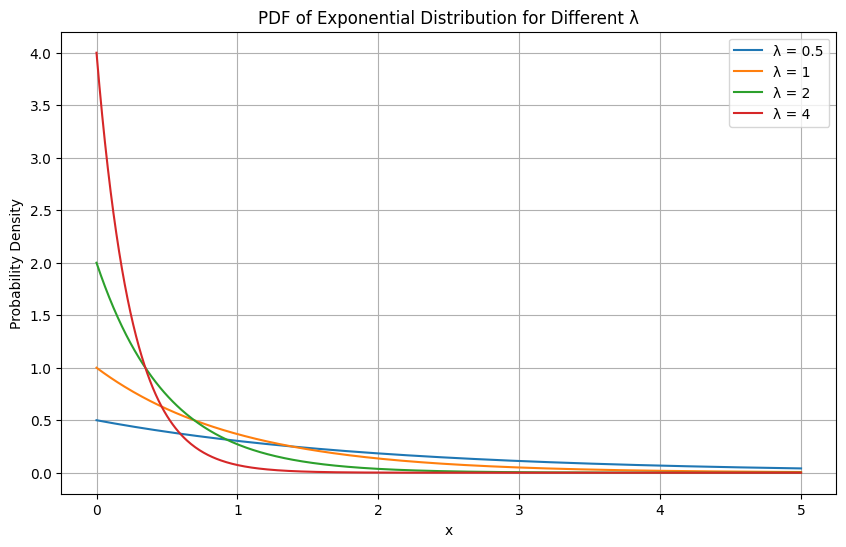

In [33]:
# x 값 정의 (0부터 5까지)
x = np.linspace(0, 5, 500)

# 각 lambda 값에 대한 pdf 계산
lambda_values = [0.5, 1, 2, 4]
pdfs = []

for l in lambda_values:
    pdf = l * np.exp(-l * x)
    pdfs.append(pdf)

# 시각화
plt.figure(figsize=(10, 6))
for i, lambda_val in enumerate(lambda_values):
    plt.plot(x, pdfs[i], label=f"λ = {lambda_val}")

plt.title("PDF of Exponential Distribution for Different λ")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

--- 
### **상관관계 - 내용추가**

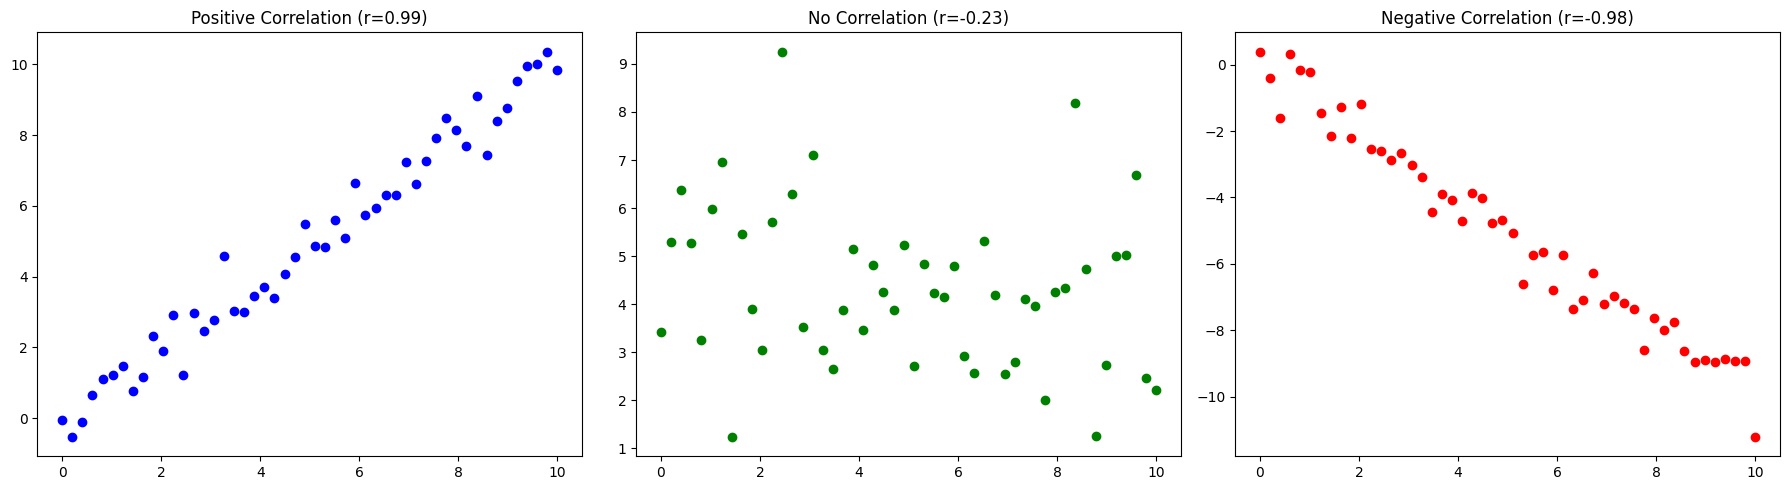

In [35]:
# 데이터 생성
x = np.linspace(0, 10, 50)
y_positive_correlation = x + np.random.normal(0, 0.5, 50)   # 양의 상관관계
y_no_correlation = np.random.normal(5, 2, 50)                # 상관관계 없음
y_negative_correlation = -x + np.random.normal(0, 0.5, 50)  # 음의 상관관계

# 시각화
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# 양의 상관관계
axs[0].scatter(x, y_positive_correlation, c='blue')
axs[0].set_title(f'Positive Correlation (r={np.corrcoef(x, y_positive_correlation)[0, 1]:.2f})')

# 상관관계 없음
axs[1].scatter(x, y_no_correlation, c='green')
axs[1].set_title(f'No Correlation (r={np.corrcoef(x, y_no_correlation)[0, 1]:.2f})')

# 음의 상관관계
axs[2].scatter(x, y_negative_correlation, c='red')
axs[2].set_title(f'Negative Correlation (r={np.corrcoef(x, y_negative_correlation)[0, 1]:.2f})')

plt.tight_layout()
plt.show()